#Download the dataset

In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction"

In [6]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:11<00:00, 143MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [7]:
data_dir = "./new-york-city-taxi-fare-prediction"

**view Dataset files**

In [8]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jul  2 17:01 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jul  2 17:01 sample_submission.csv
-rw-r--r-- 1 root root 960K Jul  2 17:01 test.csv
-rw-r--r-- 1 root root 5.4G Jul  2 17:01 train.csv


In [9]:
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [10]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [11]:
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


In [12]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [13]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [14]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


**Observations:**
This is a supervised learning regression problem
Training data is 5.5 GB in size
Training data has 5.5 million rows
Test set is much smaller (< 10,000 rows)
The training set has 8 columns:
key (a unique identifier)
fare_amount (target column)
 pickup_datetime,
pickup_longitude,
pickup_latitude,
dropoff_longitude,
dropoff_latitude,
passenger_count
The test set has all columns except the target column fare_amount.
The submission file should contain the key and fare_amount for each test sample.

#loading training set

In [15]:
!pip install pandas

work with 1% data


In [16]:
import pandas as pd

In [17]:
sample_fraction = 0.02

In [18]:
selected_cols = 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count'
selected_cols

('fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count')

In [19]:
import random

In [20]:
random.random()

0.8636601943623413

In [21]:


dtypes = {
    'fare_amount': 'float32',
     'pickup_longitude': 'float32',
     'pickup_latitude': 'float32',
     'dropoff_longitude': 'float32',
     'dropoff_latitude': 'float32',
     'passenger_count': 'uint8'

}

def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_fraction
random.seed(42)
df = pd.read_csv(data_dir+'/train.csv',
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)




#Load Test dataset

In [22]:
test_df = pd.read_csv(data_dir+'/test.csv',dtype = dtypes,parse_dates=['pickup_datetime'])

In [23]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1


# Training Set


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107083 entries, 0 to 1107082
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1107083 non-null  float32            
 1   pickup_datetime    1107083 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1107083 non-null  float32            
 3   pickup_latitude    1107083 non-null  float32            
 4   dropoff_longitude  1107077 non-null  float32            
 5   dropoff_latitude   1107077 non-null  float32            
 6   passenger_count    1107083 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 30.6 MB


In [25]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.107083e+06,1.107083e+06,1.107083e+06,1.107077e+06,1.107077e+06,1.107083e+06
mean,1.134383e+01,-7.250656e+01,3.991555e+01,-7.250867e+01,3.992317e+01,1.684860e+00
std,9.784238e+00,1.186627e+01,8.148433e+00,1.214963e+01,8.857468e+00,1.336688e+00
min,-3.000000e+02,-2.112031e+03,-3.084490e+03,-3.356730e+03,-3.084324e+03,0.000000e+00
25%,6.000000e+00,-7.399203e+01,4.073488e+01,-7.399141e+01,4.073396e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398018e+01,4.075311e+01,1.000000e+00
75%,1.250000e+01,-7.396714e+01,4.076706e+01,-7.396366e+01,4.076807e+01,2.000000e+00
max,4.990000e+02,2.420209e+03,2.560143e+03,3.440820e+03,3.351403e+03,2.080000e+02


In [26]:
df['pickup_datetime'].min() ,df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

#Test Set

In [27]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [28]:
test_df['pickup_datetime'].min() ,df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

EDA AFTER

#Prepare Training & Validation Set

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
train_df,val_df = train_test_split(df,test_size=0.2,random_state = 42)

In [30]:
len(train_df),len(val_df)

(885666, 221417)

In [31]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [32]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
529998,26.67,2010-01-31 06:12:28+00:00,-73.998596,40.748306,-73.870613,40.773972,1
166111,5.30,2011-02-27 08:41:25+00:00,-73.991371,40.727020,-73.977676,40.730225,1
808238,9.00,2014-08-11 10:18:00+00:00,-73.994476,40.740490,-73.987221,40.753700,1
887123,8.90,2011-11-25 11:03:19+00:00,-73.972282,40.757030,-73.956841,40.779427,1
604944,6.00,2013-11-16 00:03:00+00:00,0.000000,0.000000,0.000000,0.000000,6
...,...,...,...,...,...,...,...
110268,6.00,2014-12-16 20:23:00+00:00,-73.983772,40.762650,-73.985741,40.758507,2
259178,7.70,2011-04-11 21:15:00+00:00,-73.954620,40.773972,-73.976372,40.744164,1
131932,6.90,2009-06-01 23:50:00+00:00,-73.954994,40.689007,-73.977425,40.696777,5
671155,6.10,2009-07-23 12:47:00+00:00,-73.830276,40.759518,-73.836472,40.769978,5


# Extract input and outputs

In [33]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [34]:
# train_input = train_df.drop('fare_amount', axis=1)
# train_output = train_df['fare_amount']

# val_input = val_df.drop('fare_amount', axis=1)
# val_output = val_df['fare_amount']

In [35]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [36]:
target_cols = ['fare_amount']

# Trianing

In [37]:
train_inputs = train_df[input_cols]


In [38]:
train_targets = train_df[target_cols]

In [39]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
529998,-73.998596,40.748306,-73.870613,40.773972,1
166111,-73.991371,40.727020,-73.977676,40.730225,1
808238,-73.994476,40.740490,-73.987221,40.753700,1
887123,-73.972282,40.757030,-73.956841,40.779427,1
604944,0.000000,0.000000,0.000000,0.000000,6
...,...,...,...,...,...
110268,-73.983772,40.762650,-73.985741,40.758507,2
259178,-73.954620,40.773972,-73.976372,40.744164,1
131932,-73.954994,40.689007,-73.977425,40.696777,5
671155,-73.830276,40.759518,-73.836472,40.769978,5


In [40]:
train_targets

,fare_amount
529998,26.67
166111,5.30
808238,9.00
887123,8.90
604944,6.00
...,...
110268,6.00
259178,7.70
131932,6.90
671155,6.10


# validation set

In [41]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]

In [42]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
112785,-73.989868,40.741692,-73.995811,40.759354,1
265188,-74.006004,40.740005,-73.982948,40.757999,1
651826,-73.979973,40.676895,-73.953529,40.670948,1
254017,-73.993767,40.727161,-74.004601,40.752155,1
374567,-74.004791,40.746899,-73.991837,40.745075,1
...,...,...,...,...,...
129021,-73.873016,40.774029,-73.997978,40.674381,2
899915,-73.983185,40.766369,-73.975693,40.759163,1
603405,-73.970657,40.752151,-73.975647,40.729923,2
628798,-73.971771,40.760254,-73.984047,40.763294,6


In [43]:
val_targets

,fare_amount
112785,12.500000
265188,8.900000
651826,6.900000
254017,10.500000
374567,5.300000
...,...
129021,27.700001
899915,4.500000
603405,7.300000
628798,8.500000


# test

In [44]:
test_inputs = test_df[input_cols]

In [45]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [46]:
import numpy as np

# Train Hardcoded & Baseline Models

In [47]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [48]:
mean_model = MeanRegressor()

In [49]:
mean_model.fit(train_inputs, train_targets)

In [50]:
mean_model.mean

,0
fare_amount,11.33761


In [51]:
train_preds = mean_model.predict(train_inputs)

In [52]:
train_preds

array([11.33761, 11.33761, 11.33761, ..., 11.33761, 11.33761, 11.33761],
      dtype=float32)

In [53]:
val_preds = mean_model.predict(val_inputs)

In [54]:
train_targets

,fare_amount
529998,26.67
166111,5.30
808238,9.00
887123,8.90
604944,6.00
...,...
110268,6.00
259178,7.70
131932,6.90
671155,6.10


In [55]:
val_preds

array([11.33761, 11.33761, 11.33761, ..., 11.33761, 11.33761, 11.33761],
      dtype=float32)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
def rmse(targets,preds):
  return np.sqrt(mean_squared_error(targets,preds))

In [58]:
train_rmse = rmse(train_targets,train_preds)


In [59]:
train_rmse

np.float64(9.788239440658174)

In [60]:
val_rmse = rmse(val_targets,val_preds)

In [61]:
val_rmse

np.float64(9.786229825088574)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linear_model = LinearRegression()

In [64]:
linear_model.fit(train_inputs,train_targets)

LinearRegression()

In [65]:
trian_preds = linear_model.predict(train_inputs)

In [66]:
trian_preds

array([[11.32642 ],
       [11.325977],
       [11.325858],
       ...,
       [11.326211],
       [11.326481],
       [11.325824]], dtype=float32)

In [67]:
rmse(train_targets,trian_preds)

np.float64(9.78780138275206)

In [68]:
val_preds = linear_model.predict(val_inputs)

In [69]:
rmse(val_targets,val_preds)

np.float64(9.785631459893002)

In [70]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [71]:
test_preds=linear_model.predict(test_inputs)

In [72]:
test_preds

array([[11.325726],
       [11.325921],
       [11.325819],
       ...,
       [11.326921],
       [11.326195],
       [11.325738]], dtype=float32)

In [73]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [74]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [75]:
sub_df['fare_amount'] = test_preds

In [76]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.325726
1,2015-01-27 13:08:24.0000003,11.325921
2,2011-10-08 11:53:44.0000002,11.325819
3,2012-12-01 21:12:12.0000002,11.325662
4,2012-12-01 21:12:12.0000003,11.325521
...,...,...
9909,2015-05-10 12:37:51.0000002,11.325699
9910,2015-01-12 17:05:51.0000001,11.325622
9911,2015-04-19 20:44:15.0000001,11.326921
9912,2015-01-31 01:05:19.0000005,11.326195


In [77]:
sub_df.to_csv('linear_model_submission.csv',index=False)

In [78]:
# create reusable function for commom tasks

In [79]:
def predict_and_submit(model,test_inputs,filename):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(filename,index=False)
  return sub_df

In [80]:
predict_and_submit(linear_model,test_inputs,'linear_model_submission2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.325726
1,2015-01-27 13:08:24.0000003,11.325921
2,2011-10-08 11:53:44.0000002,11.325819
3,2012-12-01 21:12:12.0000002,11.325662
4,2012-12-01 21:12:12.0000003,11.325521
...,...,...
9909,2015-05-10 12:37:51.0000002,11.325699
9910,2015-01-12 17:05:51.0000001,11.325622
9911,2015-04-19 20:44:15.0000001,11.326921
9912,2015-01-31 01:05:19.0000005,11.326195


#Feature Engineering
Extract parts of date,
Remove outliers & invaild data,
Add distance between pickup & drop,
Add distance from landmarks

#Extract Parts of Date

In [81]:
def add_dateparts(df,col):
  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day
  df[col + '_weekday']= df[col].dt.weekday
  df[col + '_hour'] = df[col].dt.hour
  df['quarter'] = df['pickup_datetime'].dt.quarter
  df['is_month_start'] = df[col].dt.is_month_start
  df['is_month_end'] = df[col].dt.is_month_end
  df['is_quarter_start'] = df[col].dt.is_quarter_start
  df['is_quarter_end'] = df[col].dt.is_quarter_end
  df['is_year_start'] = df[col].dt.is_year_start
  df['is_year_end'] = df[col].dt.is_year_end

In [82]:
add_dateparts(train_df,'pickup_datetime')

In [83]:
add_dateparts(val_df,'pickup_datetime')

In [84]:
add_dateparts(test_df,'pickup_datetime')

In [85]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
529998,26.67,2010-01-31 06:12:28+00:00,-73.998596,40.748306,-73.870613,40.773972,1,2010,1,31,6,6,1,False,True,False,False,False,False
166111,5.30,2011-02-27 08:41:25+00:00,-73.991371,40.727020,-73.977676,40.730225,1,2011,2,27,6,8,1,False,False,False,False,False,False
808238,9.00,2014-08-11 10:18:00+00:00,-73.994476,40.740490,-73.987221,40.753700,1,2014,8,11,0,10,3,False,False,False,False,False,False
887123,8.90,2011-11-25 11:03:19+00:00,-73.972282,40.757030,-73.956841,40.779427,1,2011,11,25,4,11,4,False,False,False,False,False,False
604944,6.00,2013-11-16 00:03:00+00:00,0.000000,0.000000,0.000000,0.000000,6,2013,11,16,5,0,4,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6.00,2014-12-16 20:23:00+00:00,-73.983772,40.762650,-73.985741,40.758507,2,2014,12,16,1,20,4,False,False,False,False,False,False
259178,7.70,2011-04-11 21:15:00+00:00,-73.954620,40.773972,-73.976372,40.744164,1,2011,4,11,0,21,2,False,False,False,False,False,False
131932,6.90,2009-06-01 23:50:00+00:00,-73.954994,40.689007,-73.977425,40.696777,5,2009,6,1,0,23,2,True,False,False,False,False,False
671155,6.10,2009-07-23 12:47:00+00:00,-73.830276,40.759518,-73.836472,40.769978,5,2009,7,23,3,12,3,False,False,False,False,False,False


In [86]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
112785,12.500000,2013-11-11 18:24:54+00:00,-73.989868,40.741692,-73.995811,40.759354,1,2013,11,11,0,18,4,False,False,False,False,False,False
265188,8.900000,2011-10-16 18:10:00+00:00,-74.006004,40.740005,-73.982948,40.757999,1,2011,10,16,6,18,4,False,False,False,False,False,False
651826,6.900000,2011-10-10 20:16:40+00:00,-73.979973,40.676895,-73.953529,40.670948,1,2011,10,10,0,20,4,False,False,False,False,False,False
254017,10.500000,2010-04-05 19:35:00+00:00,-73.993767,40.727161,-74.004601,40.752155,1,2010,4,5,0,19,2,False,False,False,False,False,False
374567,5.300000,2010-02-04 23:58:34+00:00,-74.004791,40.746899,-73.991837,40.745075,1,2010,2,4,3,23,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129021,27.700001,2011-08-21 21:24:15+00:00,-73.873016,40.774029,-73.997978,40.674381,2,2011,8,21,6,21,3,False,False,False,False,False,False
899915,4.500000,2010-08-23 09:35:00+00:00,-73.983185,40.766369,-73.975693,40.759163,1,2010,8,23,0,9,3,False,False,False,False,False,False
603405,7.300000,2010-10-07 00:04:00+00:00,-73.970657,40.752151,-73.975647,40.729923,2,2010,10,7,3,0,4,False,False,False,False,False,False
628798,8.500000,2015-04-21 17:40:26+00:00,-73.971771,40.760254,-73.984047,40.763294,6,2015,4,21,1,17,2,False,False,False,False,False,False


In [87]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,1,False,False,False,False,False,False
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,1,False,False,False,False,False,False
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,4,False,False,False,False,False,False
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,4,True,False,False,False,False,False
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,4,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2,False,False,False,False,False,False
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,1,False,False,False,False,False,False
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,2,False,False,False,False,False,False
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,1,False,True,False,False,False,False


#Add Distance Between Pickup and Drop

In [88]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two sets of GPS coordinates.

    Parameters:
    - lat1, lon1: arrays or scalars of latitude and longitude for the first point(s)
    - lat2, lon2: arrays or scalars of latitude and longitude for the second point(s)

    Returns:
    - distance in kilometers (float or ndarray)
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    R = 6371.0  # Radius of Earth in kilometers
    return R * c


In [89]:
def add_trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_latitude'],
                                     df['pickup_longitude'],
                                     df['dropoff_latitude'],
                                     df['dropoff_longitude'])

In [90]:
add_trip_distance(train_df)

In [91]:
add_trip_distance(val_df)

In [92]:
add_trip_distance(test_df)

In [93]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,trip_distance
529998,26.67,2010-01-31 06:12:28+00:00,-73.998596,40.748306,-73.870613,40.773972,1,2010,1,31,6,6,1,False,True,False,False,False,False,11.150599
166111,5.30,2011-02-27 08:41:25+00:00,-73.991371,40.727020,-73.977676,40.730225,1,2011,2,27,6,8,1,False,False,False,False,False,False,1.207686
808238,9.00,2014-08-11 10:18:00+00:00,-73.994476,40.740490,-73.987221,40.753700,1,2014,8,11,0,10,3,False,False,False,False,False,False,1.591094
887123,8.90,2011-11-25 11:03:19+00:00,-73.972282,40.757030,-73.956841,40.779427,1,2011,11,25,4,11,4,False,False,False,False,False,False,2.809480
604944,6.00,2013-11-16 00:03:00+00:00,0.000000,0.000000,0.000000,0.000000,6,2013,11,16,5,0,4,False,False,False,False,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6.00,2014-12-16 20:23:00+00:00,-73.983772,40.762650,-73.985741,40.758507,2,2014,12,16,1,20,4,False,False,False,False,False,False,0.489710
259178,7.70,2011-04-11 21:15:00+00:00,-73.954620,40.773972,-73.976372,40.744164,1,2011,4,11,0,21,2,False,False,False,False,False,False,3.787456
131932,6.90,2009-06-01 23:50:00+00:00,-73.954994,40.689007,-73.977425,40.696777,5,2009,6,1,0,23,2,True,False,False,False,False,False,2.079082
671155,6.10,2009-07-23 12:47:00+00:00,-73.830276,40.759518,-73.836472,40.769978,5,2009,7,23,3,12,3,False,False,False,False,False,False,1.274801


#Add Distance From Popular Landmarks


| Location                       | Latitude | Longitude |
| ------------------------------ | -------- | --------- |
| **Times Square**               | 40.7580  | -73.9855  |
| **Central Park**               | 40.7829  | -73.9654  |
| **Statue of Liberty**          | 40.6892  | -74.0445  |
| **Empire State Building**      | 40.7484  | -73.9857  |
| **Brooklyn Bridge**            | 40.7061  | -73.9969  |
| **Grand Central Terminal**     | 40.7527  | -73.9772  |
| **Wall Street (NYSE)**         | 40.7069  | -74.0113  |
| **Metropolitan Museum of Art** | 40.7794  | -73.9632  |
| **One World Trade Center**     | 40.7127  | -74.0134  |
| **Yankee Stadium**             | 40.8296  | -73.9262  |


| Airport Name                | Code | Latitude | Longitude |
| --------------------------- | ---- | -------- | --------- |
| **John F. Kennedy Airport** | JFK  | 40.6413  | -73.7781  |
| **LaGuardia Airport**       | LGA  | 40.7769  | -73.8740  |
| **Newark Liberty Airport**  | EWR  | 40.6895  | -74.1745  |


In [94]:
jfk_lonlat = 	-73.7781, 40.6413
lga_lonlat = 	-73.8740, 40.7769
ewr_lonlat = 	-74.1745,	40.6895
ts_lonlat = 		-73.9855,40.7580
cp_lonlat	= 	-73.9654, 40.7829
sol_lonlat= 		-74.0445, 40.6892
esb_lonlat= 		-73.9857, 40.7484
bb_lonlat	= 	-73.9969, 40.7061
gct_lonlat= 		-73.9772, 40.7527
wt_lonlat	=   	-74.0113,40.7069
mmoa_lonlat=		-73.9632, 40.7794
wtc_lonla=  		-74.0134, 40.7127
ys_lonlat=	  	-73.9262, 40.8296


In [95]:
def add_landmark_dropoff_distance(df,ladmark_name,landmark_lonlat):
  lon, let = landmark_lonlat
  df[ladmark_name + '_drop_distance'] = haversine_np(df['dropoff_latitude'],
                                                     df['dropoff_longitude'],
                                                     let,
                                                     lon)

In [96]:
def add_landmark(a_df):
  landmarks = [('jfk',jfk_lonlat),('lga',lga_lonlat),('ewr',ewr_lonlat),('ts',ts_lonlat),('cp',cp_lonlat),('sol',sol_lonlat),('esb',esb_lonlat),('bb',bb_lonlat),('gct',gct_lonlat),('wt',wt_lonlat),('mmoa',mmoa_lonlat),('wtc',wtc_lonla),('ys',ys_lonlat)]
  for name,lonlat in landmarks:
    add_landmark_dropoff_distance(a_df,name,lonlat)

In [97]:
add_landmark(train_df)

In [98]:
add_landmark(val_df)

In [99]:
add_landmark(test_df)

In [100]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,...,ts_drop_distance,cp_drop_distance,sol_drop_distance,esb_drop_distance,bb_drop_distance,gct_drop_distance,wt_drop_distance,mmoa_drop_distance,wtc_drop_distance,ys_drop_distance
529998,26.67,2010-01-31 06:12:28+00:00,-73.998596,40.748306,-73.870613,40.773972,1,2010,1,31,...,9.836843,8.042882,17.422359,10.101604,13.044273,9.283069,14.004107,7.819728,13.824588,7.755713
166111,5.30,2011-02-27 08:41:25+00:00,-73.991371,40.727020,-73.977676,40.730225,1,2011,2,27,...,3.157927,5.947665,7.248287,2.131092,3.133626,2.499402,3.841547,5.602147,3.586156,11.869814
808238,9.00,2014-08-11 10:18:00+00:00,-73.994476,40.740490,-73.987221,40.753700,1,2014,8,11,...,0.499592,3.730533,8.645558,0.603040,5.355293,0.851311,5.585646,3.500845,5.064786,9.880198
887123,8.90,2011-11-25 11:03:19+00:00,-73.972282,40.757030,-73.956841,40.779427,1,2011,11,25,...,3.391366,0.818058,12.458570,4.220387,8.824275,3.431064,9.278486,0.536004,8.817955,6.146374
604944,6.00,2013-11-16 00:03:00+00:00,0.000000,0.000000,0.000000,0.000000,6,2013,11,16,...,8666.295898,8665.141602,8669.777344,8666.115234,8666.176758,8665.500000,8667.387695,8664.888672,8667.678711,8662.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6.00,2014-12-16 20:23:00+00:00,-73.983772,40.762650,-73.985741,40.758507,2,2014,12,16,...,0.059896,3.208048,9.160209,1.123659,5.902429,0.966815,6.129069,3.000075,5.601152,9.360701
259178,7.70,2011-04-11 21:15:00+00:00,-73.954620,40.773972,-73.976372,40.744164,1,2011,4,11,...,1.720023,4.405361,8.385844,0.916435,4.571996,0.951902,5.082455,4.072117,4.687690,10.397165
131932,6.90,2009-06-01 23:50:00+00:00,-73.954994,40.689007,-73.977425,40.696777,5,2009,6,1,...,6.841528,9.629721,5.717857,5.782404,1.941492,6.218291,3.069638,9.264874,3.511412,15.386516
671155,6.10,2009-07-23 12:47:00+00:00,-73.830276,40.759518,-73.836472,40.769978,5,2009,7,23,...,12.621533,10.951379,19.696791,12.796171,15.268975,12.007318,16.314589,10.723095,16.209656,10.049898


#outliers

In [101]:
def remove_outliers(df):
  return df[(df['fare_amount'] >=1.) &
         (df['fare_amount'] <= 500.) &
          (df['passenger_count'] >= 1) &
          (df['passenger_count'] <= 6) &
            (df['trip_distance'] >= 0.1) &
            (df['trip_distance'] <= 50) &
            (df['pickup_longitude']>= -75)&
            (df['pickup_longitude']<= -72)&
            (df['pickup_latitude']>= 39)&
            (df['pickup_latitude']<= 42)&
            (df['dropoff_longitude']>= -75)&
            (df['dropoff_longitude']<= -72)&
            (df['dropoff_latitude']>= 39)&
            (df['dropoff_latitude']<= 42) &
            (df['jfk_drop_distance'] <= 100) &
            (df['lga_drop_distance'] <= 100) &
            (df['ewr_drop_distance'] <= 100) &
            (df['ts_drop_distance'] <= 100) &
            (df['cp_drop_distance'] <= 100) &
            (df['sol_drop_distance'] <= 100) &
            (df['esb_drop_distance'] <= 100) &
            (df['bb_drop_distance'] <= 100) &
            (df['gct_drop_distance'] <= 100) &
            (df['wt_drop_distance'] <= 100)]


In [102]:
train_df = remove_outliers(train_df)

In [103]:
var_df = remove_outliers(val_df)

In [104]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'ts_drop_distance',
       'cp_drop_distance', 'sol_drop_distance', 'esb_drop_distance',
       'bb_drop_distance', 'gct_drop_distance', 'wt_drop_distance',
       'mmoa_drop_distance', 'wtc_drop_distance', 'ys_drop_distance'],
      dtype='object')

In [105]:
# train_df.to_parquet("train_features.parquet")
# val_df.to_parquet("val_features.parquet")


In [106]:
test_df.to_parquet("test_features.parquet")

In [107]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'ts_drop_distance',
       'cp_drop_distance', 'sol_drop_distance', 'esb_drop_distance',
       'bb_drop_distance', 'gct_drop_distance', 'wt_drop_distance',
       'mmoa_drop_distance', 'wtc_drop_distance', 'ys_drop_distance'],
      dtype='object')

 # Trian & Evaluate Diffrent Models

In [108]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'ts_drop_distance',
       'cp_drop_distance', 'sol_drop_distance', 'esb_drop_distance',
       'bb_drop_distance', 'gct_drop_distance', 'wt_drop_distance',
       'mmoa_drop_distance', 'wtc_drop_distance', 'ys_drop_distance'],
      dtype='object')

In [109]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'ts_drop_distance',
       'cp_drop_distance', 'sol_drop_distance', 'esb_drop_distance',
       'bb_drop_distance', 'gct_drop_distance', 'wt_drop_distance',
       'mmoa_drop_distance', 'wtc_drop_distance', 'ys_drop_distance'

]

In [110]:
target_col = 'fare_amount'

In [111]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [112]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [113]:
test_inputs = test_df[input_cols]

In [114]:
def evaluate (model):
  train_preds =  model.predict(train_inputs)
  train_rmse = rmse(train_targets, train_preds)
  val_preds = model.predict(val_inputs)
  val_rmse =  rmse(val_targets, val_preds)
  return train_rmse, val_rmse, train_preds,val_preds

#Rige Regression

In [115]:
from sklearn.linear_model import Ridge

In [116]:
model1 = Ridge(random_state = 42,alpha = 0.9)

In [ ]:
model1.fit(train_inputs,train_targets)

,alpha,0.9
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [ ]:
evaluate(model1)

(np.float64(3.7777350716933293),
 np.float64(897.6186229312309),
 array([30.39422077,  5.24720424,  8.64971327, ...,  7.49946051,
        10.88553216,  5.62907619], shape=(849378,)),
 array([ 9.8373654 ,  9.76486915,  9.0497292 , ...,  8.56686329,
         8.64647274, 11.97153563], shape=(221416,)))

In [ ]:
train_inputs.shape

(849378, 31)

In [ ]:
predict_and_submit(model1,test_inputs,'ridge_submission3.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.314776
1,2015-01-27 13:08:24.0000003,10.384486
2,2011-10-08 11:53:44.0000002,4.698433
3,2012-12-01 21:12:12.0000002,8.797910
4,2012-12-01 21:12:12.0000003,16.353956
...,...,...
9909,2015-05-10 12:37:51.0000002,9.302978
9910,2015-01-12 17:05:51.0000001,12.355449
9911,2015-04-19 20:44:15.0000001,48.386194
9912,2015-01-31 01:05:19.0000005,21.337523


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(random_state = 42,n_jobs =-1,max_depth = 10,n_estimators = 50)

In [ ]:
model2.fit(train_inputs,train_targets)

,n_estimators,50
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install pyarrow

In [ ]:
evaluate(model2)

(np.float64(3.1459148523855927),
 np.float64(6.090147490695239),
 array([29.2071826 ,  5.89600601,  9.07020672, ...,  7.84172749,
         5.97053274,  4.86192011], shape=(849378,)),
 array([ 9.82148758,  9.26834909,  8.44249974, ...,  9.06744168,
         7.04269288, 10.52176094], shape=(221416,)))

In [ ]:
#predict_and_submit(model2,test_inputs,'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.444850
1,2015-01-27 13:08:24.0000003,10.901594
2,2011-10-08 11:53:44.0000002,4.995389
3,2012-12-01 21:12:12.0000002,8.312939
4,2012-12-01 21:12:12.0000003,14.864619
...,...,...
9909,2015-05-10 12:37:51.0000002,9.078052
9910,2015-01-12 17:05:51.0000001,12.860356
9911,2015-04-19 20:44:15.0000001,55.316147
9912,2015-01-31 01:05:19.0000005,21.118899


#XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#!pip install xgboost

In [ ]:
model3 = XGBRegressor(max_depth = 5,objective='reg:squarederror',
                      n_estimators = 200,random_state = 42,n_jobs =-1)

In [ ]:
model3.fit(train_inputs,train_targets)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
evaluate(model3)

(np.float64(2.8186297270496543),
 np.float64(5.427168403100309),
 array([26.089067 ,  4.8773804,  8.753693 , ...,  7.198277 ,  6.878097 ,
         5.6736765], shape=(849378,), dtype=float32),
 array([ 9.9976845,  8.3948765,  7.398689 , ...,  7.3279405,  8.691476 ,
        14.204412 ], shape=(221416,), dtype=float32))

In [ ]:
predict_and_submit(model3,test_inputs,'XGB_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.468576
1,2015-01-27 13:08:24.0000003,10.961587
2,2011-10-08 11:53:44.0000002,4.631715
3,2012-12-01 21:12:12.0000002,8.780714
4,2012-12-01 21:12:12.0000003,15.678161
...,...,...
9909,2015-05-10 12:37:51.0000002,8.569160
9910,2015-01-12 17:05:51.0000001,11.540597
9911,2015-04-19 20:44:15.0000001,54.844379
9912,2015-01-31 01:05:19.0000005,18.949993


#Hyperparameter


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_predictions = model.predict(train_inputs)
    val_predictions = model.predict(val_inputs)

    train_rmse = np.sqrt(mean_squared_error(train_targets, train_predictions))
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))

    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []

    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o', label='Training')
    plt.plot(param_values, val_errors, 'r-o', label='Validation')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#!pip install matplotlib

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs':-1,
    'objective' :'reg:squarederror'
}

C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:73

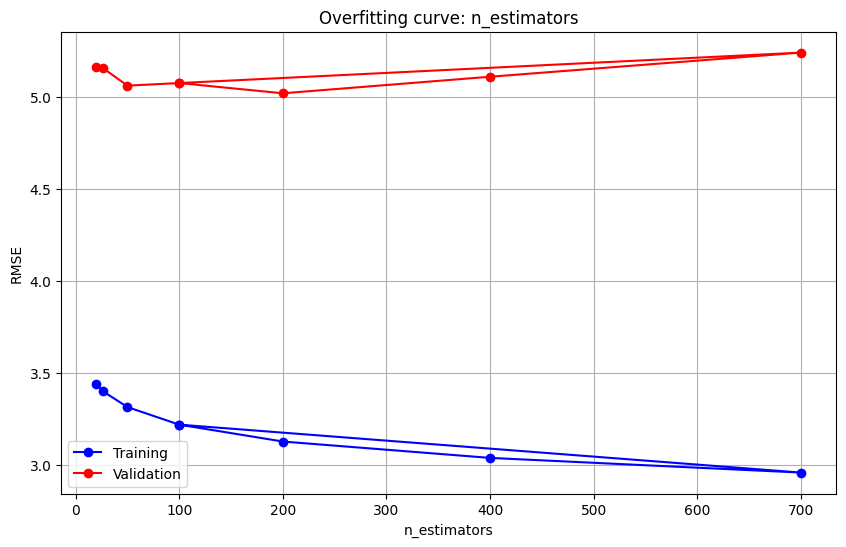

In [ ]:
# N_ESTIMATORS FINDING
test_param_and_plot(XGBRegressor,'n_estimators',[20,26,50,100,200,400,700,100],**best_params)
#200

In [ ]:
# we unberstand that 26 is best n_estimator

In [ ]:
best_params['num_estimators'] = 200

In [ ]:
# model31 = XGBRegressor(max_depth = 5,objective='reg:squarederror',
#                       n_estimators = 26,random_state = 42,n_jobs =-1)
# model31.fit(train_inputs,train_targets)

In [ ]:
#evaluate(model3)

In [ ]:
#predict_and_submit(model3,test_inputs,'XGB2_submission.csv')

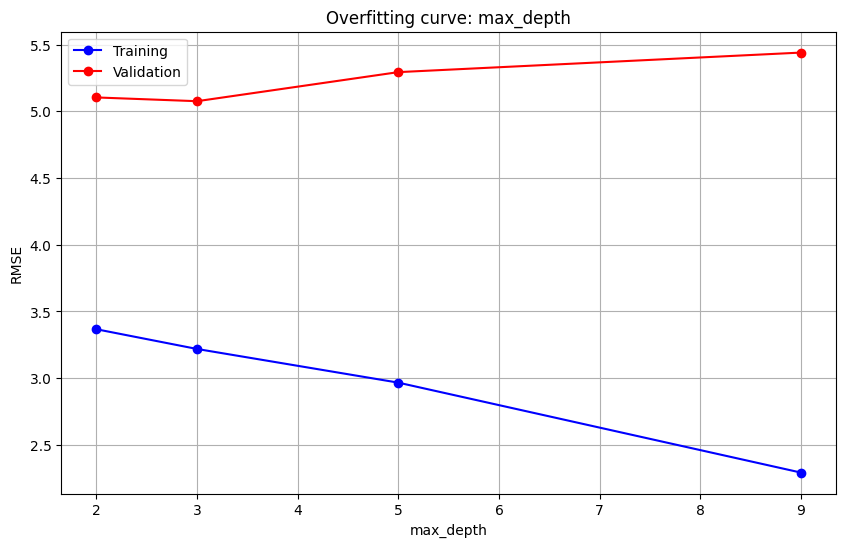

In [ ]:
#MAX_DEPTH FINDING
test_param_and_plot(XGBRegressor,'max_depth',[2,3,5,9])
# 3

In [ ]:
best_params['max_depth'] = 3

C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "num_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PRATHAMESH\anaconda3\envs\project22\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:73

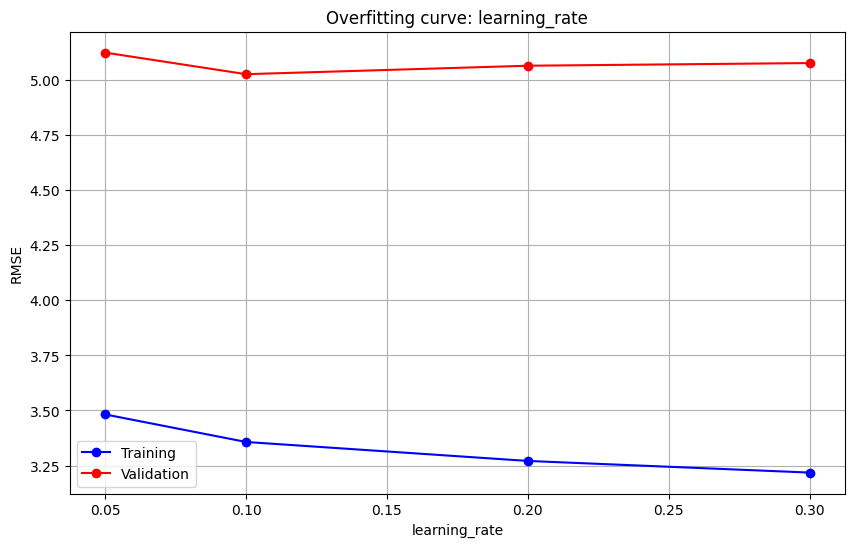

In [ ]:
#LR FINDING

test_param_and_plot(XGBRegressor,'learning_rate',[0.05,0.1,0.2,0.3],**best_params)
#0.1

In [ ]:
best_params['learning_rate'] = 0.1

#FINAL MODEL

In [ ]:
xgb_model_final = XGBRegressor(objective='reg:squarederror',
                               n_jobs = -1,
                               n_estimators = 200,
                               max_depth = 5
                              )

In [ ]:
xgb_model_final.fit(train_inputs,train_targets)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
evaluate(xgb_model_final)

(np.float64(2.8186297270496543),
 np.float64(5.427168403100309),
 array([26.089067 ,  4.8773804,  8.753693 , ...,  7.198277 ,  6.878097 ,
         5.6736765], shape=(849378,), dtype=float32),
 array([ 9.9976845,  8.3948765,  7.398689 , ...,  7.3279405,  8.691476 ,
        14.204412 ], shape=(221416,), dtype=float32))

In [ ]:
#predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.468576
1,2015-01-27 13:08:24.0000003,10.961587
2,2011-10-08 11:53:44.0000002,4.631715
3,2012-12-01 21:12:12.0000002,8.780714
4,2012-12-01 21:12:12.0000003,15.678161
...,...,...
9909,2015-05-10 12:37:51.0000002,8.569160
9910,2015-01-12 17:05:51.0000001,11.540597
9911,2015-04-19 20:44:15.0000001,54.844379
9912,2015-01-31 01:05:19.0000005,18.949993


In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(xgb_model_final, 'New_York_City_Taxi_Fare_Prediction.pkl')


['New_York_City_Taxi_Fare_Prediction.pkl']